In [1]:
import os
import datetime as dt
from datetime import date
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from pprint import pprint
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

pd.set_option('max_columns', 330)
pd.set_option('max_rows', 1000)

In [2]:
%matplotlib inline
# plt.style.use('ggplot')

# Load DataFrames

In [3]:
input_path = r'C:\Users\Panagiotis.Mavritsak\Desktop\Ner thesis\\'
df = pd.read_excel(input_path+'data.xlsx', index_col=0)
df = df.resample('W', label='right').mean()
df

Aluminium (USD/tonne)  Copper (USD/pound)  Zinc (USD/tonne)  \
Date                                                                      
1995-01-08            2001.400000             1.35775       1136.650000   
1995-01-15            2021.260000             1.40180       1143.740000   
1995-01-22            2081.160000             1.41560       1175.720000   
1995-01-29            2123.160000             1.41920       1171.680000   
1995-02-05            2070.400000             1.35700       1109.650000   
...                           ...                 ...               ...   
2019-12-08            1768.650000             2.72610       2234.650000   
2019-12-15            1754.650000             2.83600       2241.250000   
2019-12-22            1773.450000             2.86050       2313.850000   
2019-12-29            1808.916667             2.86750       2290.416667   
2020-01-05            1798.375000             2.86575       2290.000000   

            Nickel (USD/MT)  Lead (USD/tonne)  Tin (USD/tonne)  \
Date                                                             
1995-01-08      9010.250000        653.700000           6007.0   
1995-01-15      9408.000000        658.740000           6047.2   
1995-01-22      9800.000000        666.520000           6306.0   
1995-01-29     10031.800000        683.780000           6382.2   
1995-02-05      9575.500000        628.750000           5889.5   
...                     ...               ...              ...   
2019-12-08     13342.800000       1888.950000          16754.5   
2019-12-15     13711.200000       1902.150000          17200.5   
2019-12-22     14088.800000       1889.950000          17275.0   
2019-12-29     14229.166667       1920.583333          17180.0   
2020-01-05     14093.500000       1921.875000          17062.5   

            Silver (USD/ t oz)   Gold (USD/ t oz)  Crude Oil WTI (USD/ bbl)  \
Date                                                                          
1995-01-08               4.6565        375.050000                 17.577500   
1995-01-15               4.7266        376.780000                 17.546000   
1995-01-22               4.8576        381.780000                 18.454000   
1995-01-29               4.7630        380.380000                 18.214000   
1995-02-05               4.6855        376.800000                 18.435000   
...                         ...               ...                       ...   
2019-12-08              16.9154       1473.660000                 57.683160   
2019-12-15              16.7924       1469.960000                 59.270000   
2019-12-22              17.0846       1477.360000                 60.653200   
2019-12-29              17.7280       1499.733333                 60.989667   
2020-01-05              17.9610       1520.850000                 61.080250   

            Crude oil Brent (USD/bbl)  Natural gas (USD/Mmbtu)  USD index   \
Date                                                                         
1995-01-08                  16.310000                 1.587750   89.252500   
1995-01-15                  16.422000                 1.399200   88.300000   
1995-01-22                  16.758000                 1.388600   87.952000   
1995-01-29                  16.670000                 1.387800   87.532000   
1995-02-05                  16.885000                 1.430000   87.645000   
...                               ...                      ...         ...   
2019-12-08                  62.572480                 2.395620   97.670200   
2019-12-15                  64.303700                 2.278860   97.340800   
2019-12-22                  65.791360                 2.312000   97.342000   
2019-12-29                  66.109733                 2.174133   97.410333   
2020-01-05                  66.419100                 2.158750   96.564500   

              DJIA (USD)   FTSE 100 (GBP)  Hang seng (HKD)   US libor  
Date                                                          

check if values are missing

In [4]:
df.isnull().sum()

Aluminium (USD/tonne)        1
Copper (USD/pound)           1
Zinc (USD/tonne)             1
Nickel (USD/MT)              1
Lead (USD/tonne)             1
Tin (USD/tonne)              1
Silver (USD/ t oz)           1
Gold (USD/ t oz)             1
Crude Oil WTI (USD/ bbl)     1
Crude oil Brent (USD/bbl)    1
Natural gas (USD/Mmbtu)      1
USD index                    1
DJIA (USD)                   1
 FTSE 100 (GBP)              1
Hang seng (HKD)              1
 US libor                    1
dtype: int64

In [5]:
df[ df.isnull()['Aluminium (USD/tonne)'] == True ]

Aluminium (USD/tonne)  Copper (USD/pound)  Zinc (USD/tonne)  \
Date                                                                      
2003-07-06                    NaN                 NaN               NaN   

            Nickel (USD/MT)  Lead (USD/tonne)  Tin (USD/tonne)  \
Date                                                             
2003-07-06              NaN               NaN              NaN   

            Silver (USD/ t oz)   Gold (USD/ t oz)  Crude Oil WTI (USD/ bbl)  \
Date                                                                          
2003-07-06                  NaN               NaN                       NaN   

            Crude oil Brent (USD/bbl)  Natural gas (USD/Mmbtu)  USD index   \
Date                                                                         
2003-07-06                        NaN                      NaN         NaN   

            DJIA (USD)   FTSE 100 (GBP)  Hang seng (HKD)   US libor  
Date                                                                 
2003-07-06         NaN              NaN              NaN        NaN

In [6]:
df = df.fillna(method="ffill")  # one biased row
df.isnull().sum()

Aluminium (USD/tonne)        0
Copper (USD/pound)           0
Zinc (USD/tonne)             0
Nickel (USD/MT)              0
Lead (USD/tonne)             0
Tin (USD/tonne)              0
Silver (USD/ t oz)           0
Gold (USD/ t oz)             0
Crude Oil WTI (USD/ bbl)     0
Crude oil Brent (USD/bbl)    0
Natural gas (USD/Mmbtu)      0
USD index                    0
DJIA (USD)                   0
 FTSE 100 (GBP)              0
Hang seng (HKD)              0
 US libor                    0
dtype: int64

### Plot distributions

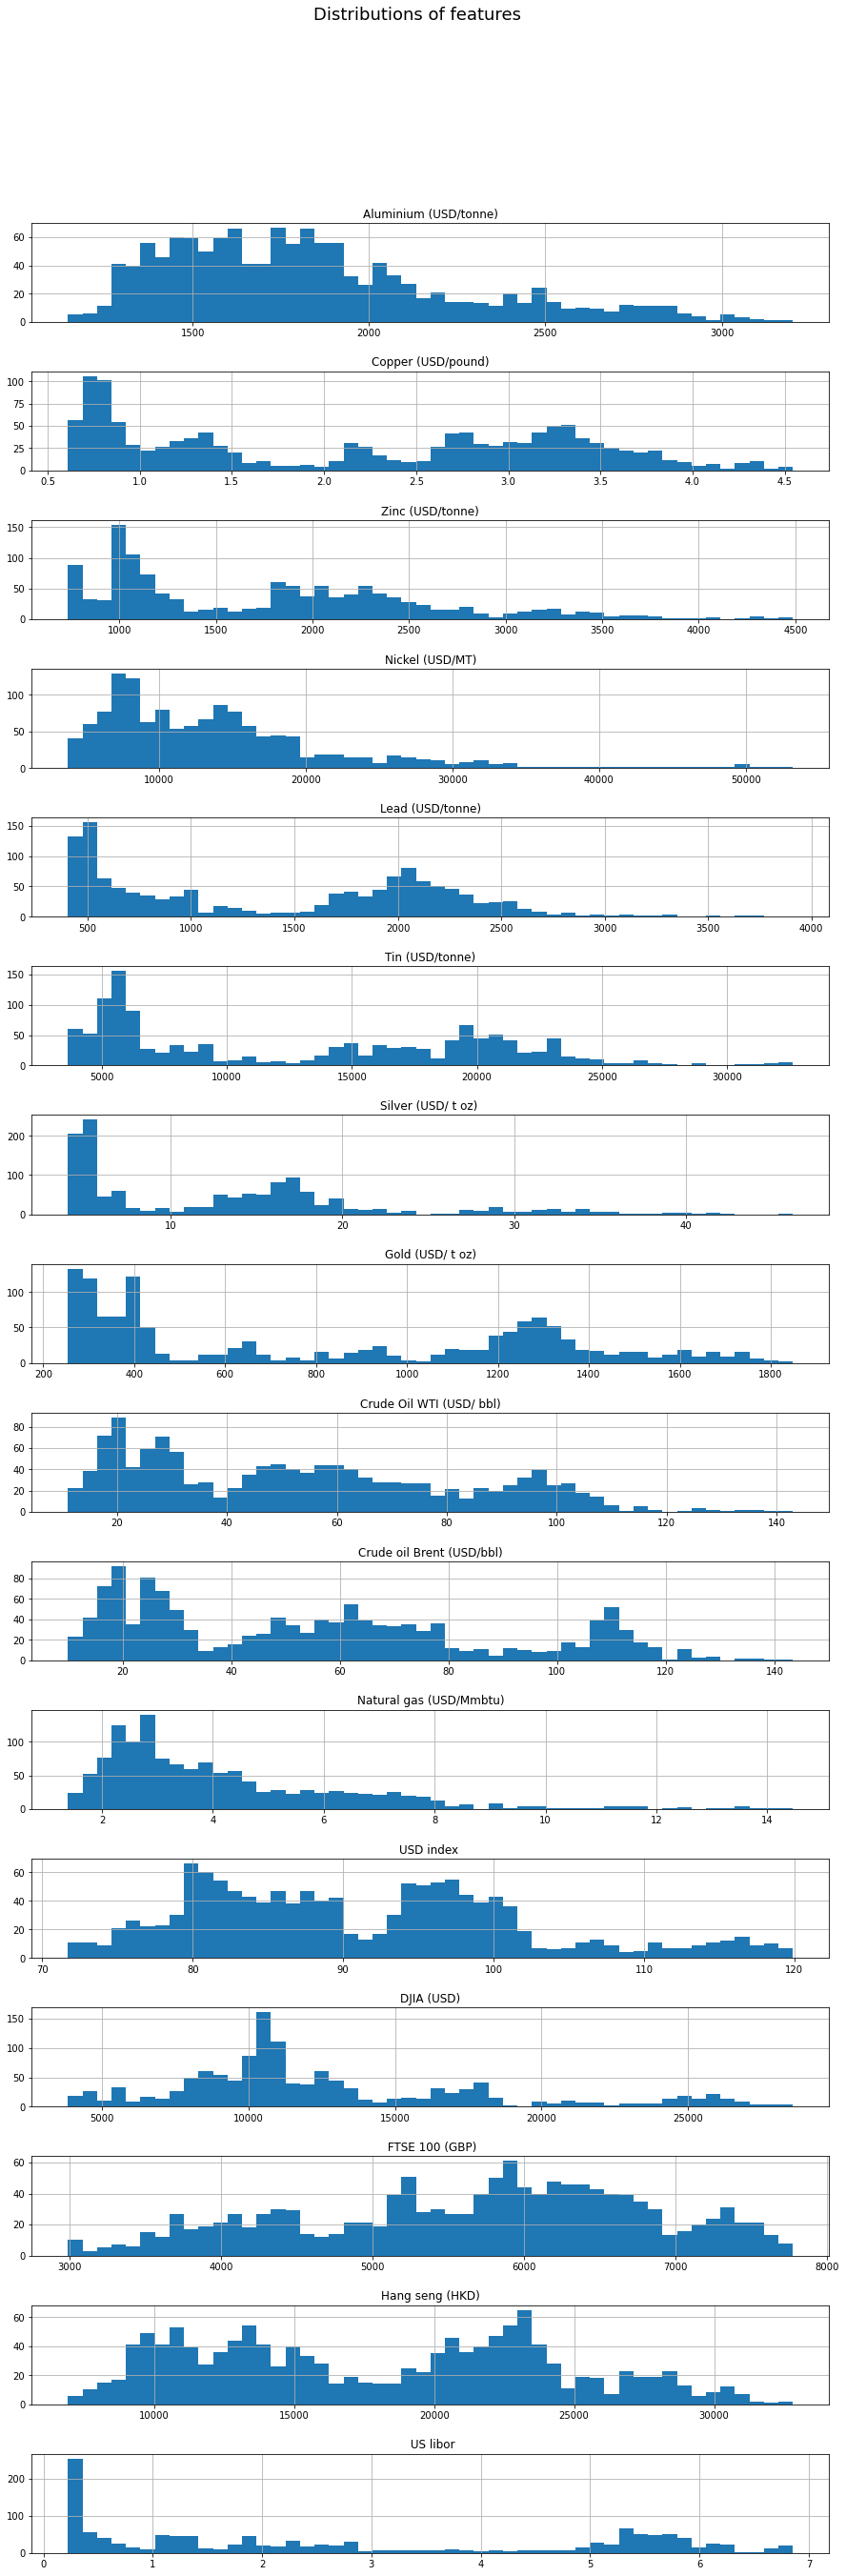

In [7]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distributions of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    df[column].hist(ax=ax, bins=50)

    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Autocorrelation plots

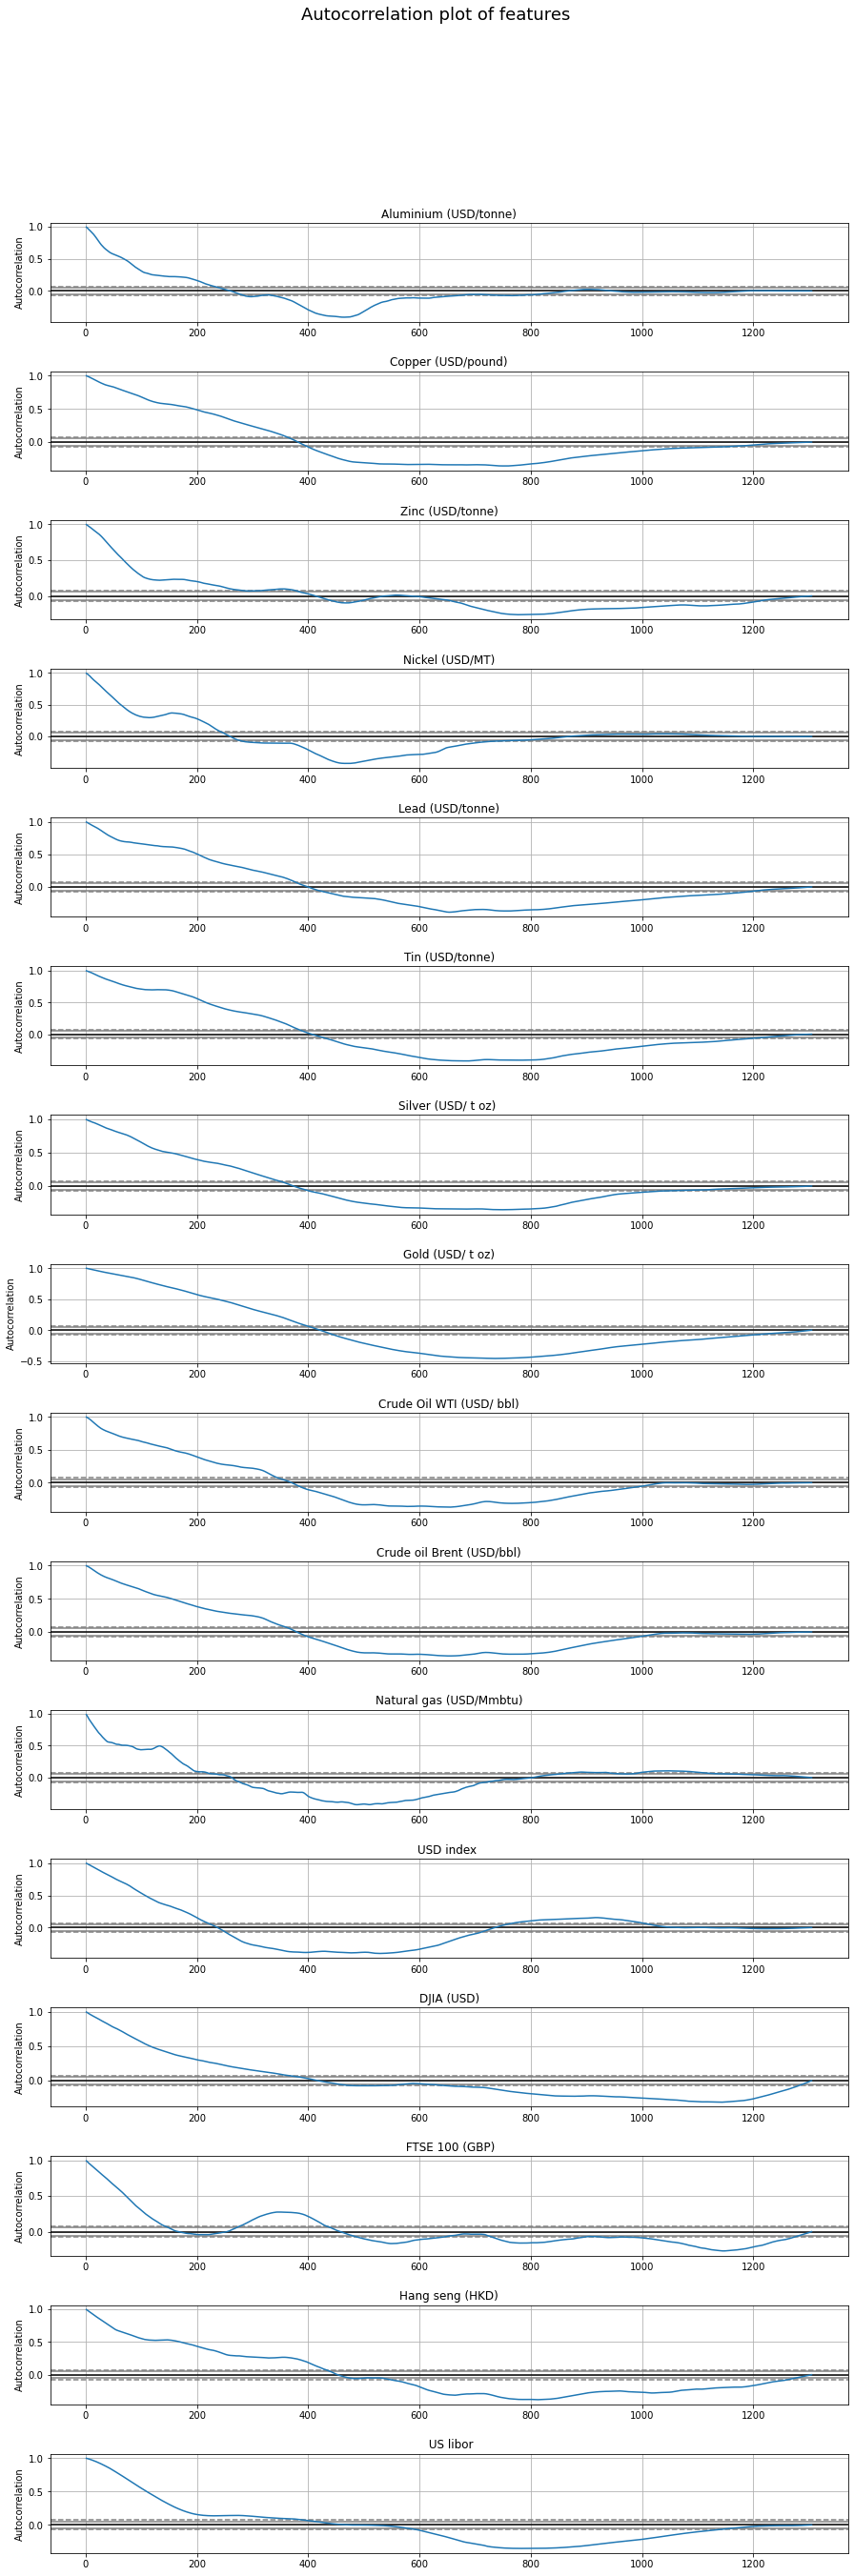

In [8]:
# define subplot grid
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Autocorrelation plot of features", fontsize=18, y=0.95)
for column, ax in zip(df.columns, axs.ravel()):  # no date or month plot
    pd.plotting.autocorrelation_plot(df[column], ax=ax)
    
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel("")

plt.show()

### Time-series and correlation plots

Functions for anomalies and plotting

In [9]:
def calc_anom_df(df):
    '''Calculate daily anomolies based on average data throughout the full time series
    Returns: New pandas dataframe with anomoloies calculated for each variable
    '''
    anom_df = pd.DataFrame(data=df.index, columns=['Date'])
    anom_df.set_index('Date', inplace=True)
    var_list = list(df.columns)
    
    for var in var_list:
        anom_df[var] = df[var] - df.mean()[var]
    
    return(anom_df)

def var_plots(df, anomaly=False):
    '''Plot of volatility alongside with raw features
    Return: Time series plots of all variables
    '''
    if anomaly==True:
        title=f'Features ANOMALIES time-series'
    else:
        title=f'Features time-series'
        
    df.plot(subplots=True, figsize=(16,12), title=title)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
    plt.xlabel('Date', fontsize = 14)
    plt.grid()
    
    if anomaly==True:
        title=f'Correlation map on ANOMALIES'
    else:
        title=f'Correlation map'
    
    corrmat = df.corr()
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
    plt.title(title, fontsize=15)
    plt.show()

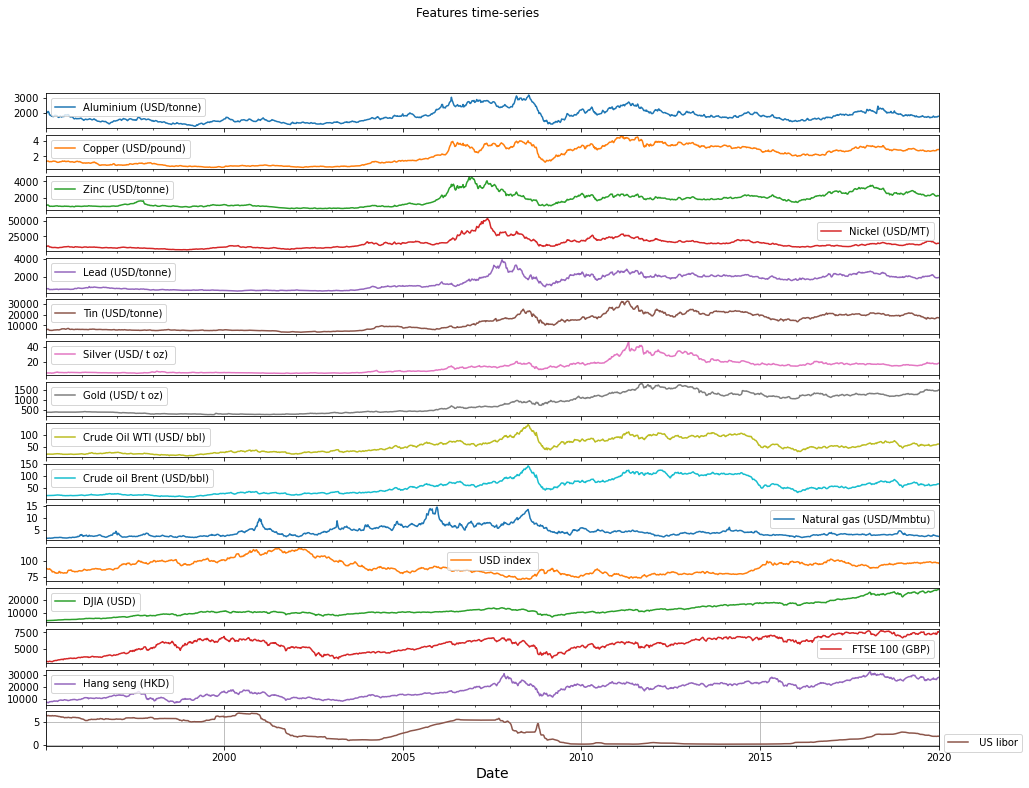

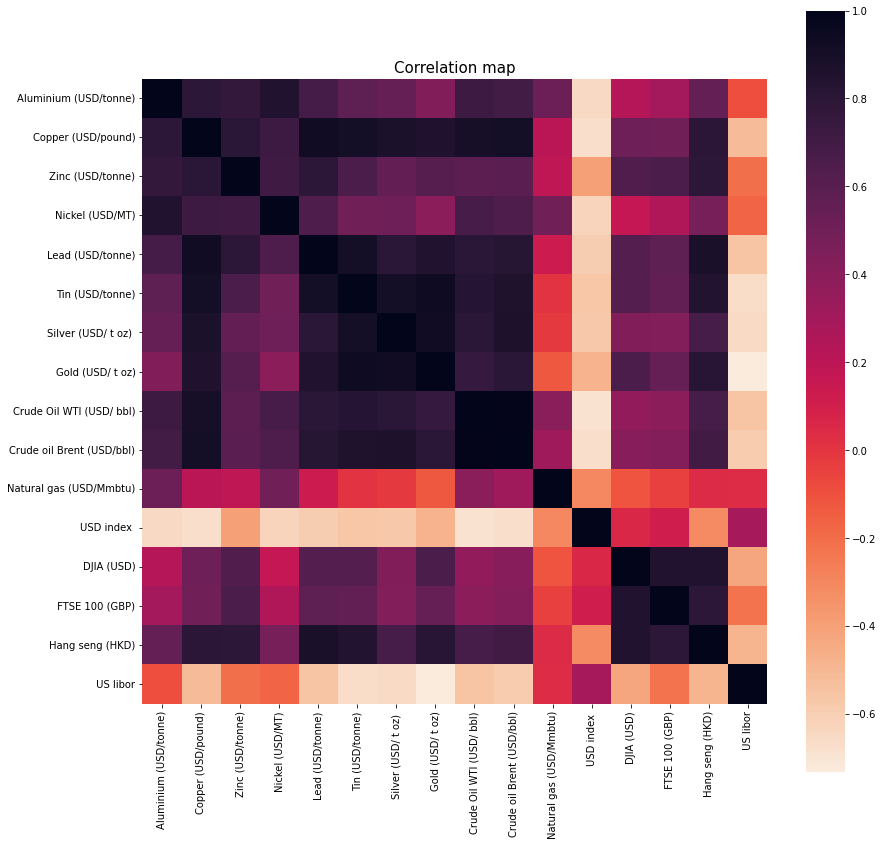

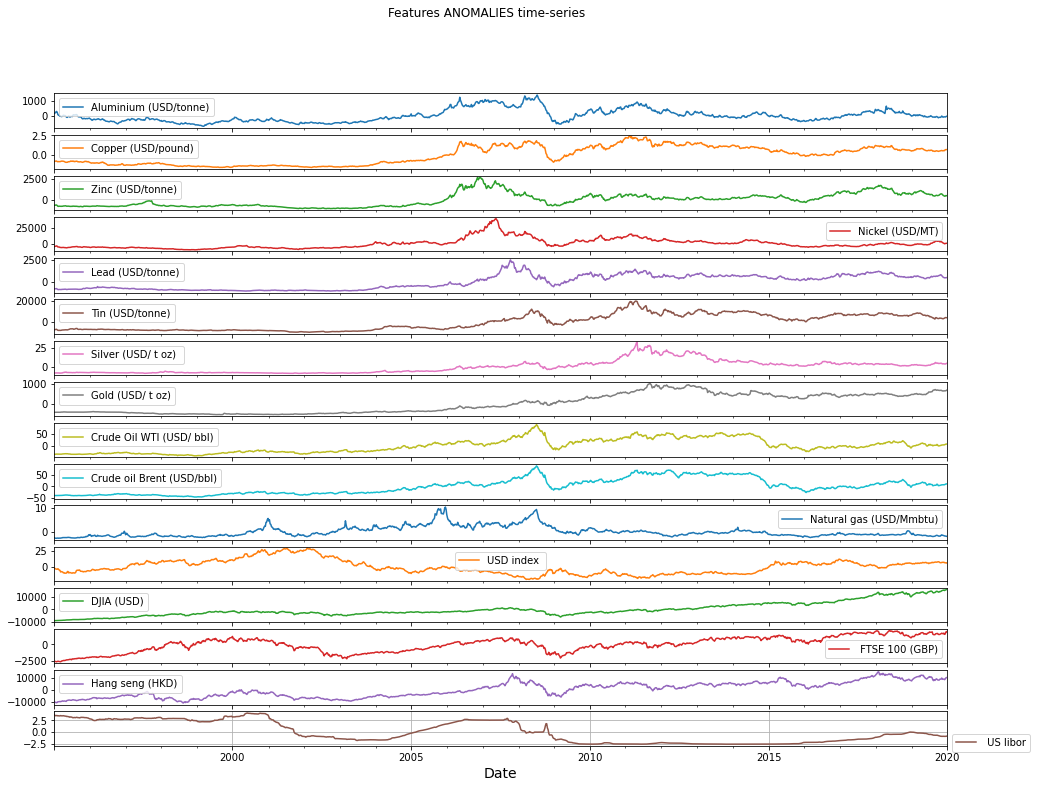

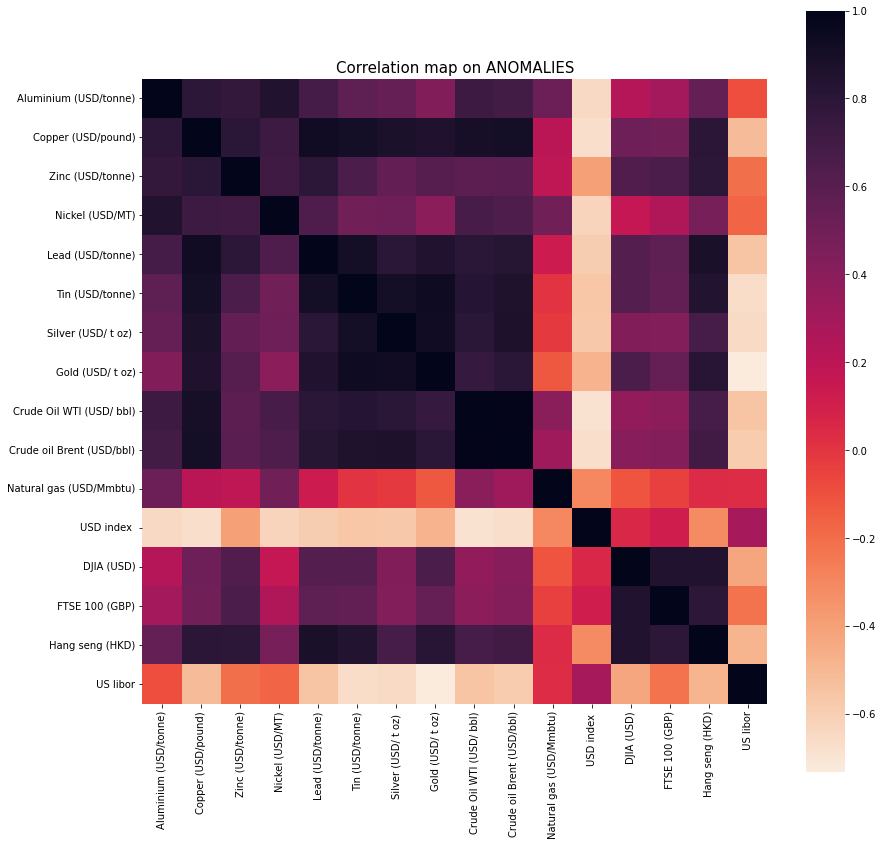

In [10]:
anom_df = calc_anom_df(df)

var_plots(df)
var_plots(anom_df, anomaly=True)

### Boxplots seasonal etc.

In [11]:
def season_plot(df, column):
    '''Produces plots for analysis of monthly malaria prevalence time series
    Arg1: dataframe produced from data preparation script, including 'malaria prevalence' column
    Returns: Time series plot, ACF plot, month-wise boxplot, year-wise boxplot
    '''
    season_df = df[['Date', column]]
    season_df['year'] = season_df.Date.dt.year
    season_df['month'] = season_df.Date.dt.month
    season_df = season_df.dropna()
    variable = column
    fig, ax = plt.subplots(figsize=(15, 6))

    palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
    sns.lineplot(x=season_df['month'], y=season_df[variable], hue=season_df['year'], palette='muted')
    ax.set_title('Seasonal plot of '+column, fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Month', fontsize = 16)
    ax.set_ylabel(column, fontsize = 16)
    ax.legend(loc='right')
    plt.show()

    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.boxplot(x=season_df['month'], y=season_df[variable], ax=ax[0])
    ax[0].set_title('Month-wise Box Plot', fontsize = 20, loc='center')
    ax[0].set_xlabel('Month', fontsize = 16)
    ax[0].set_ylabel(column, fontsize = 16)
    
    sns.boxplot(x=season_df['year'], y=season_df[variable], ax=ax[1])
    ax[1].set_title('Year-wise Box Plot', fontsize = 20, loc='center')
    ax[1].set_xlabel('Year', fontsize = 16)
    ax[1].set_ylabel(column, fontsize = 16)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


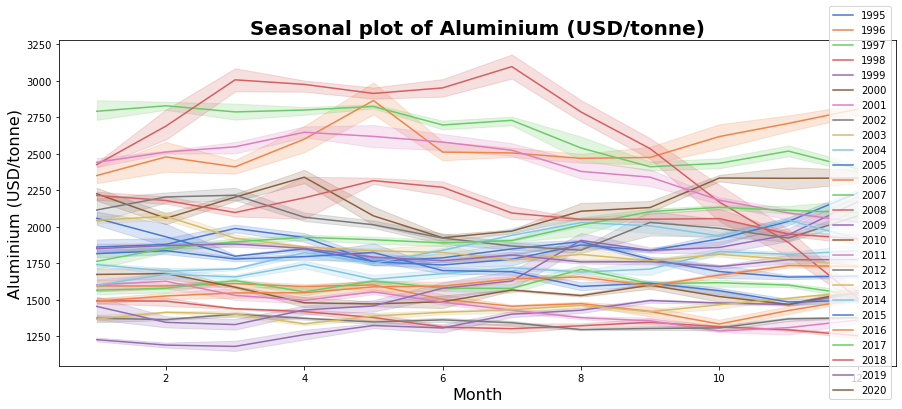

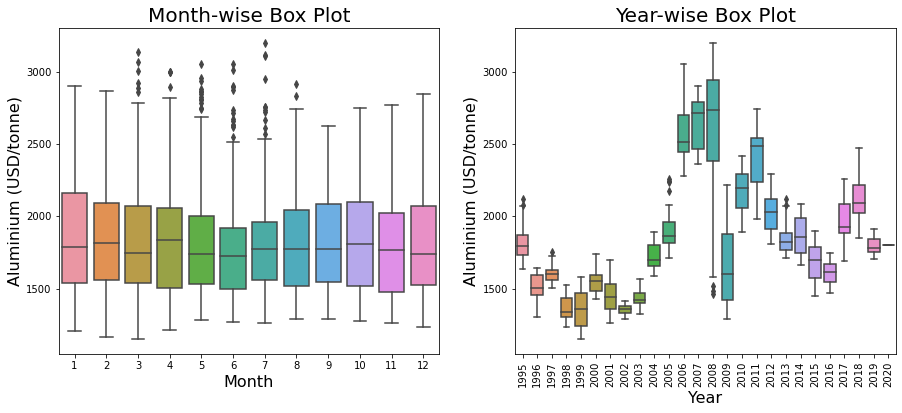

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


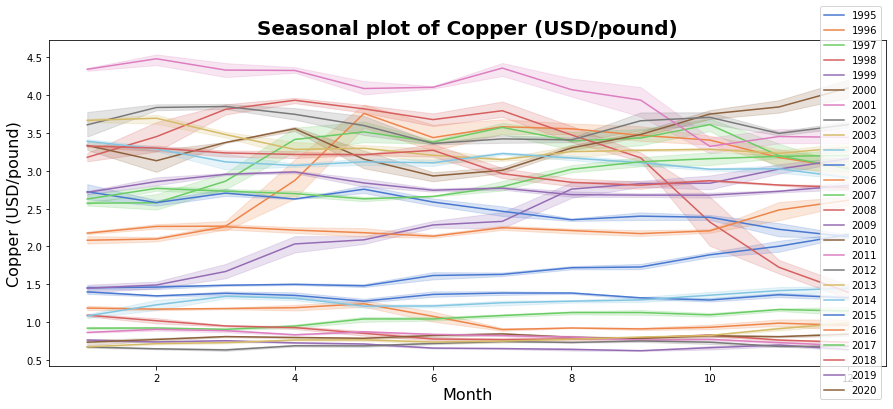

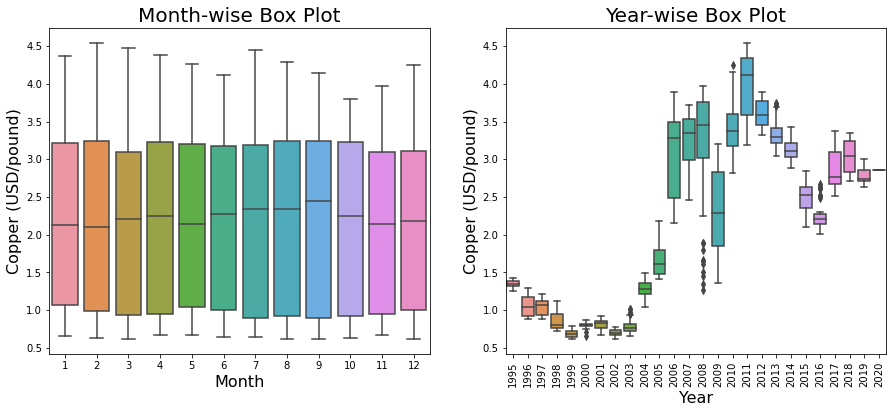

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


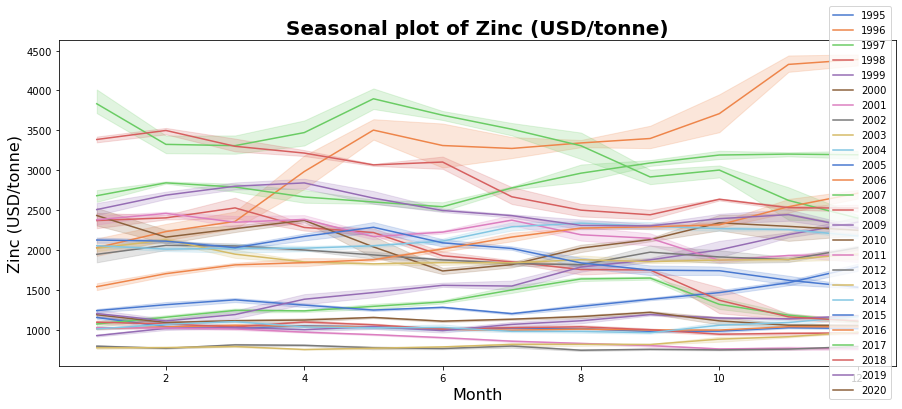

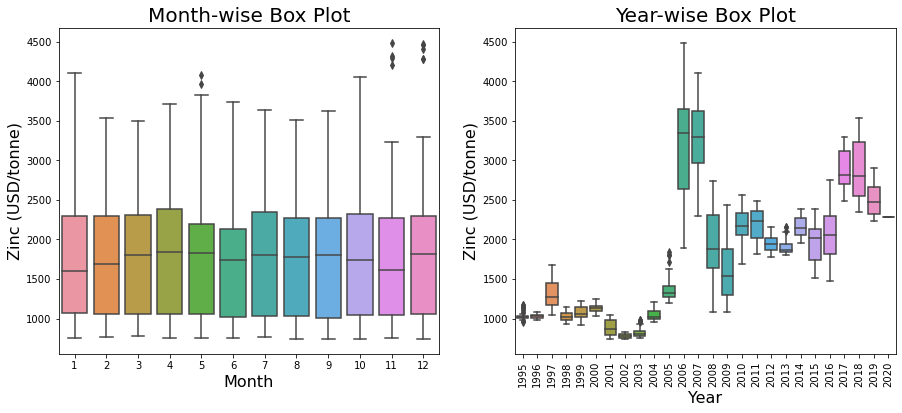

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


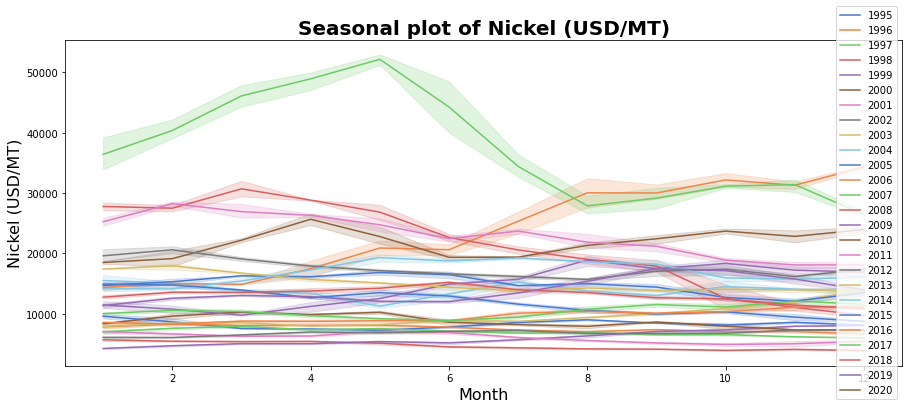

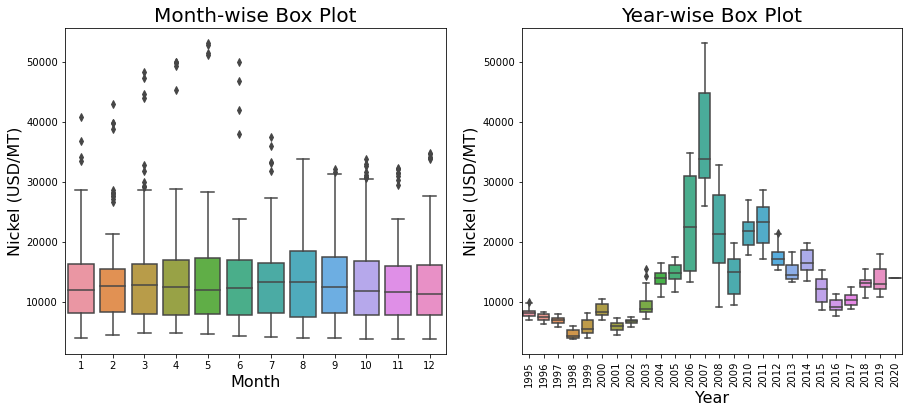

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


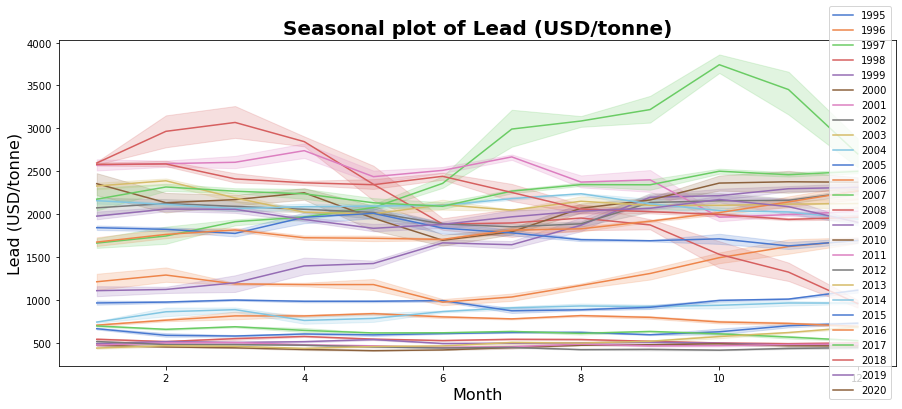

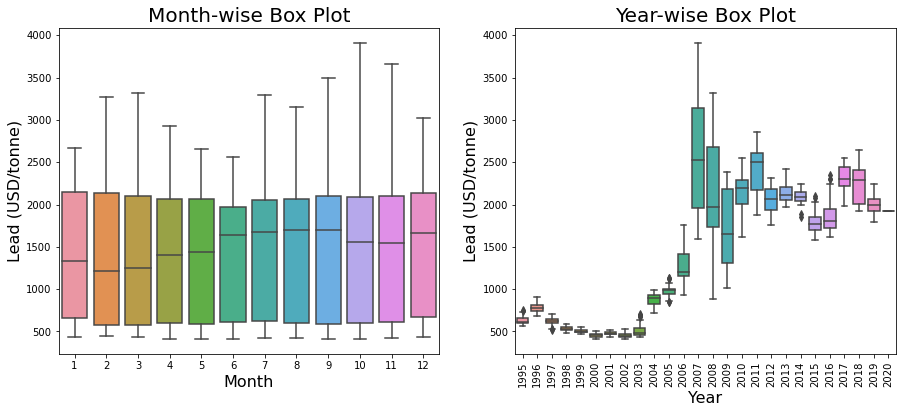

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


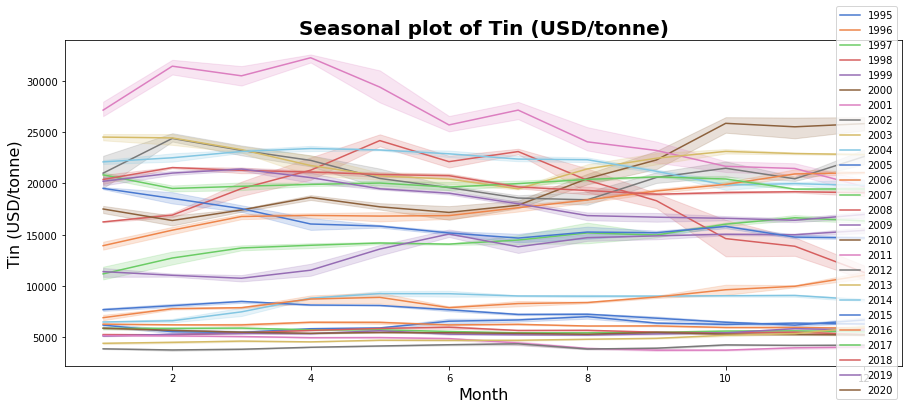

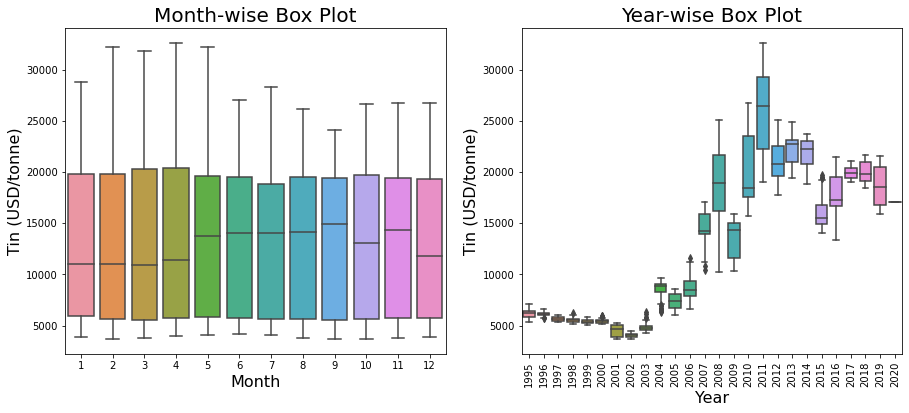

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


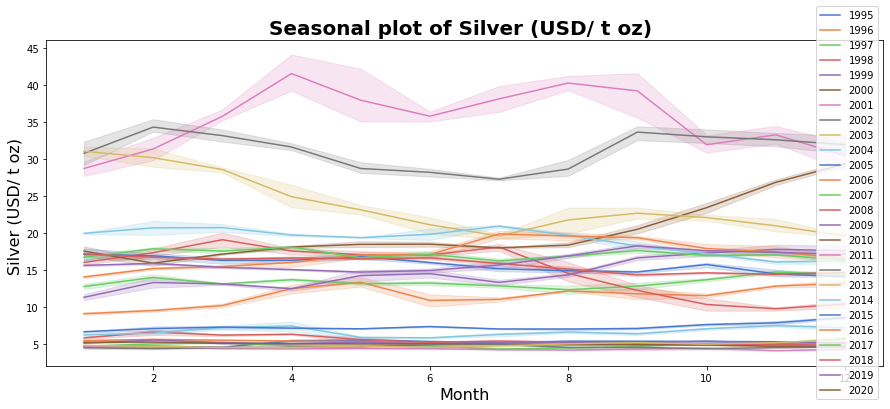

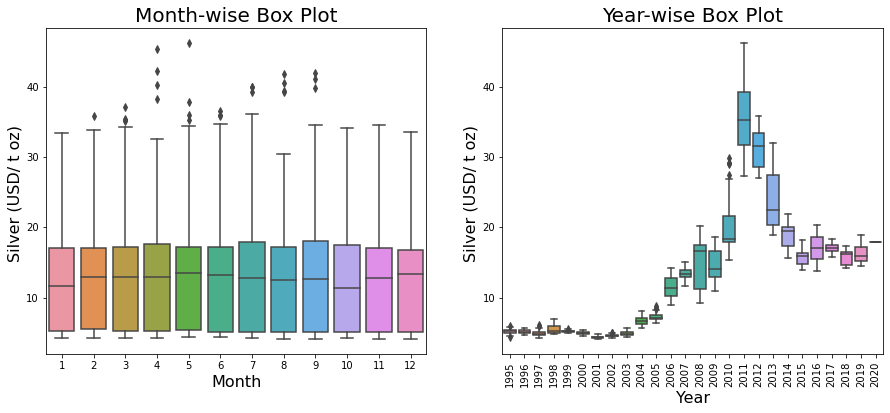

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


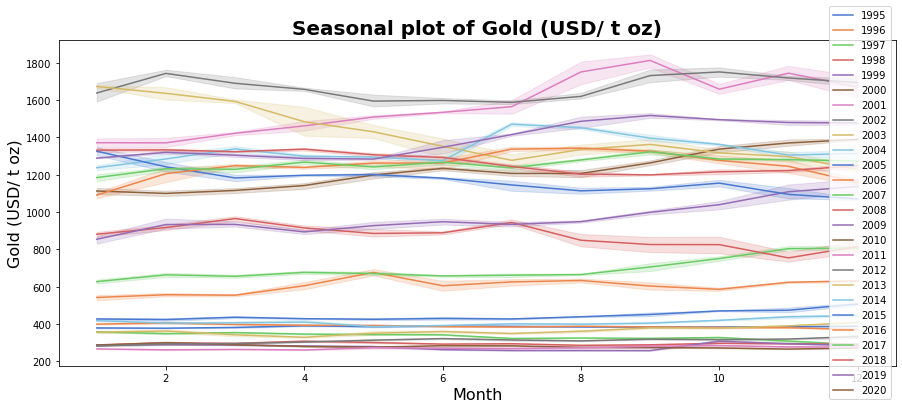

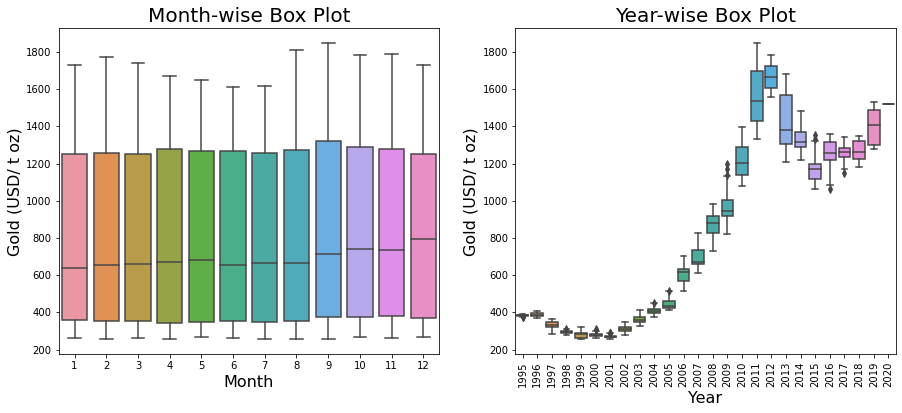

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


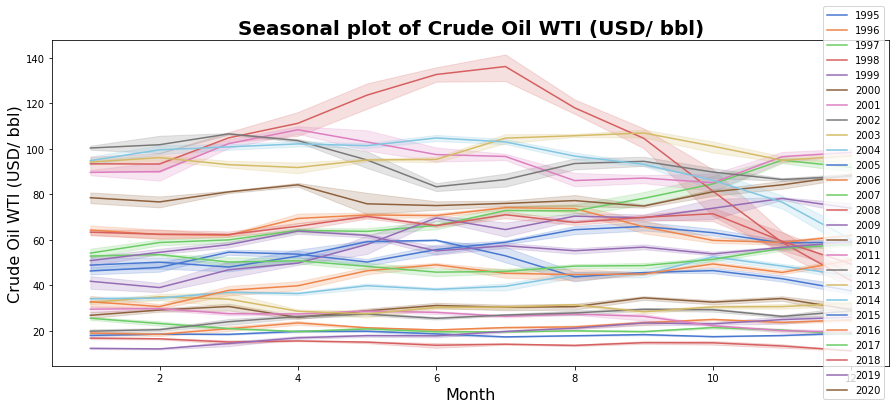

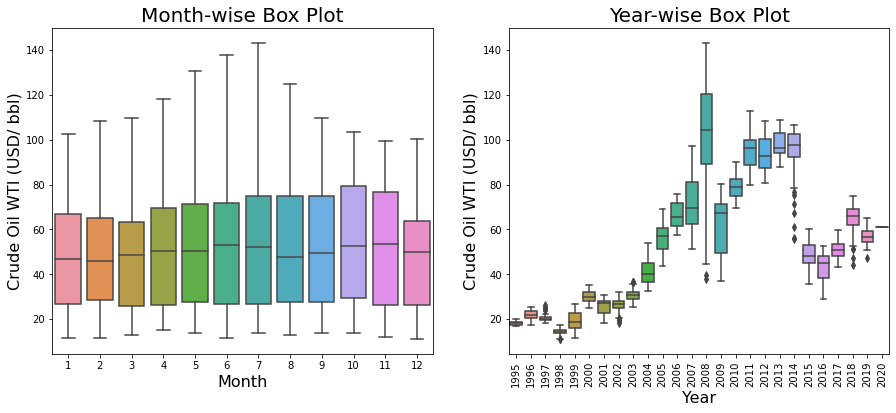

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


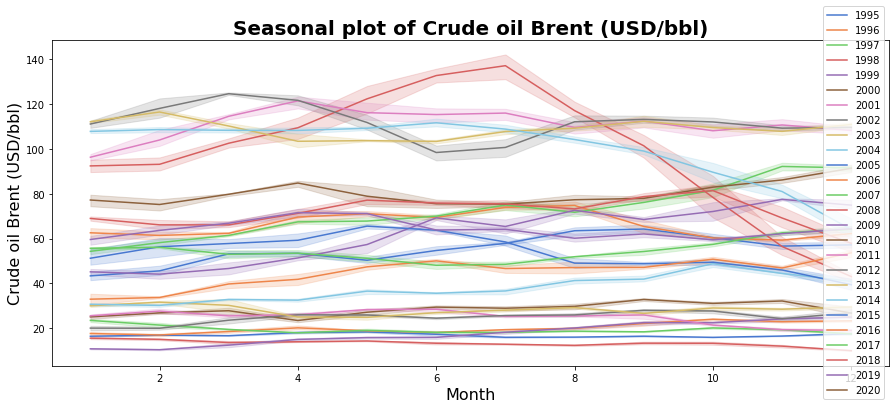

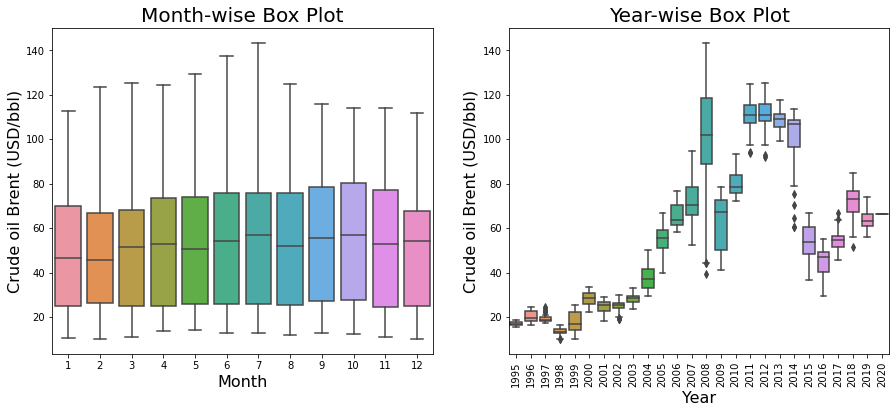

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


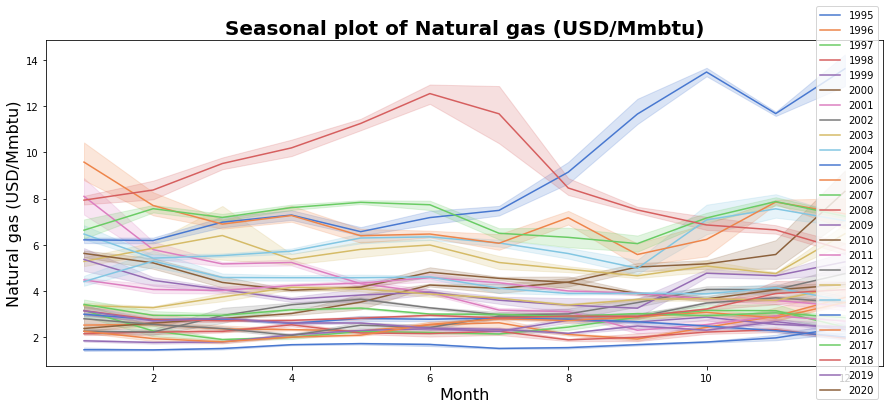

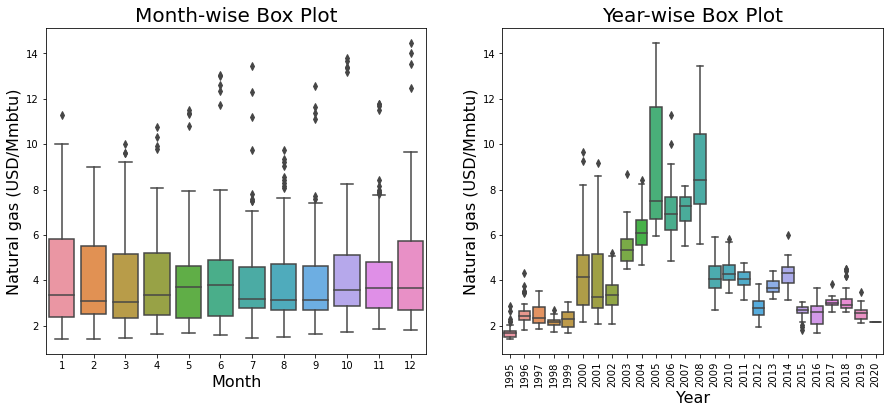

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


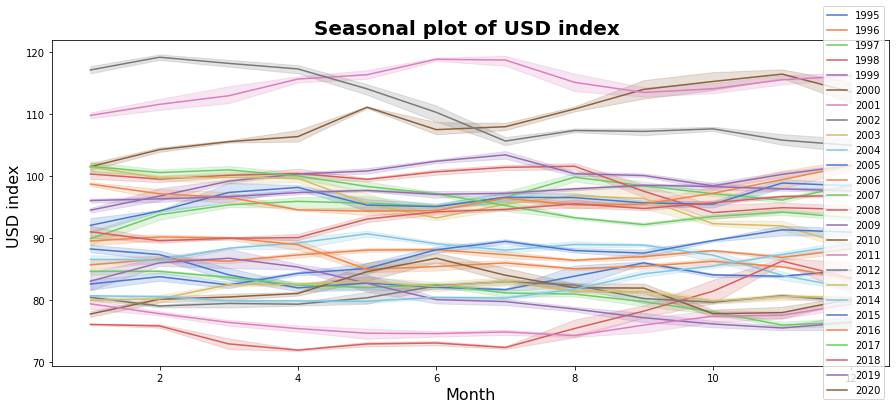

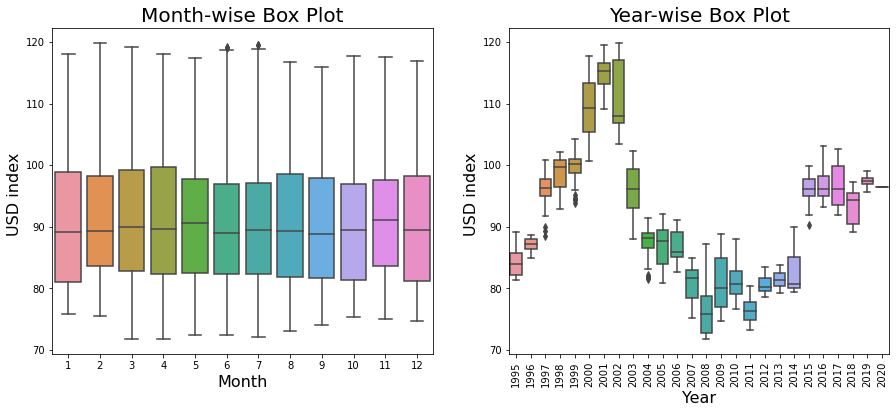

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


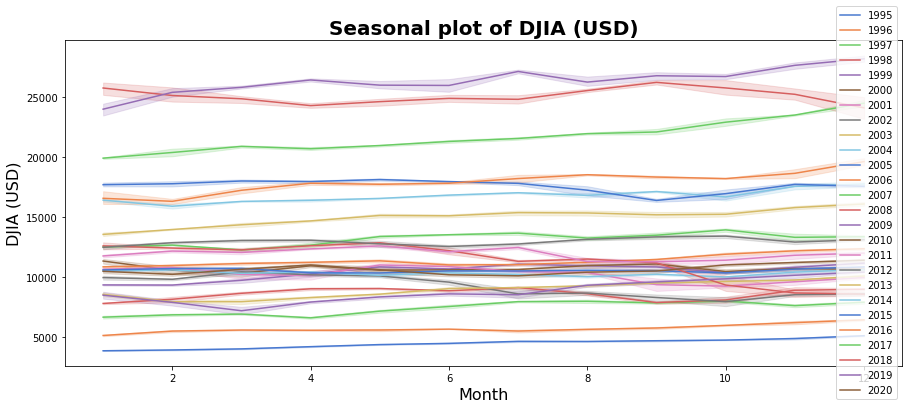

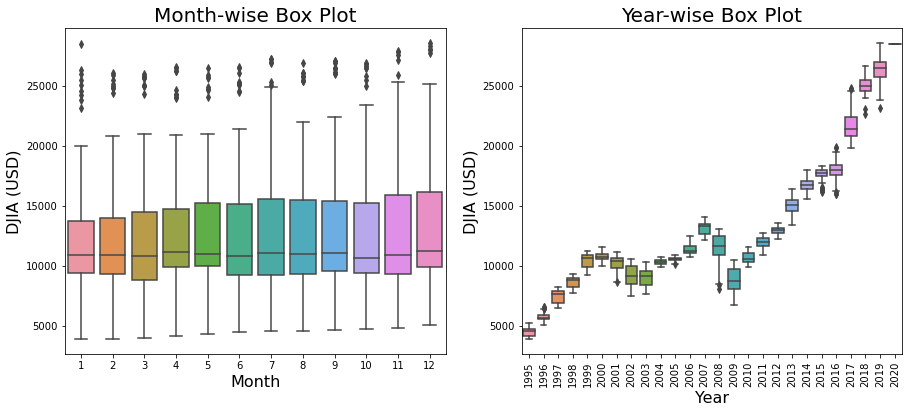

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


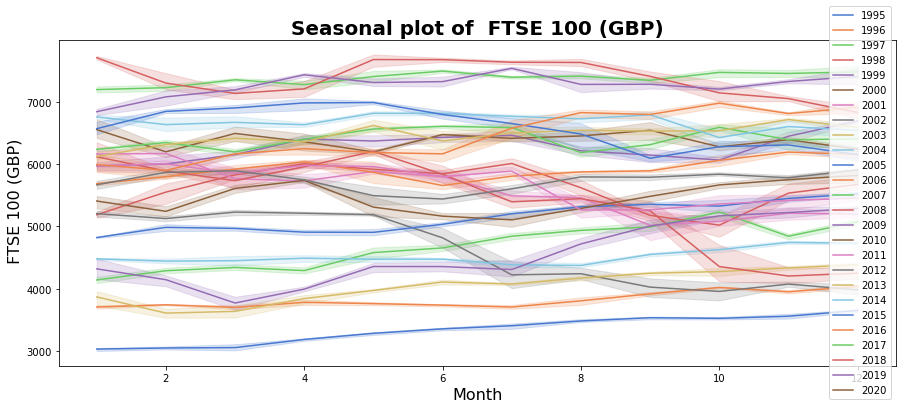

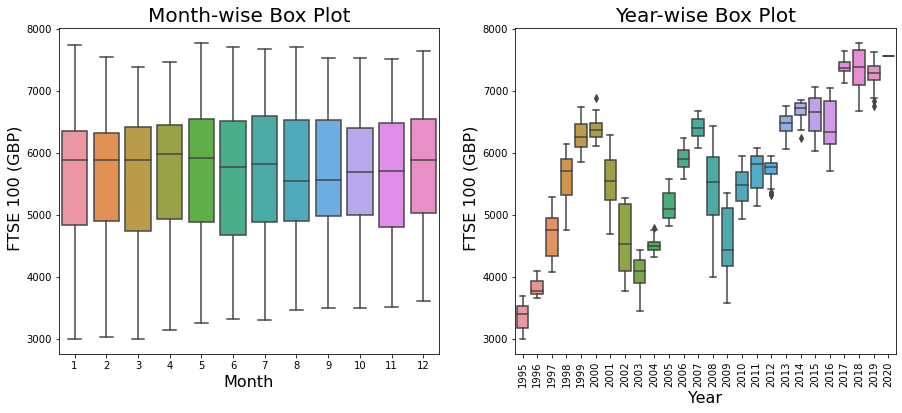

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


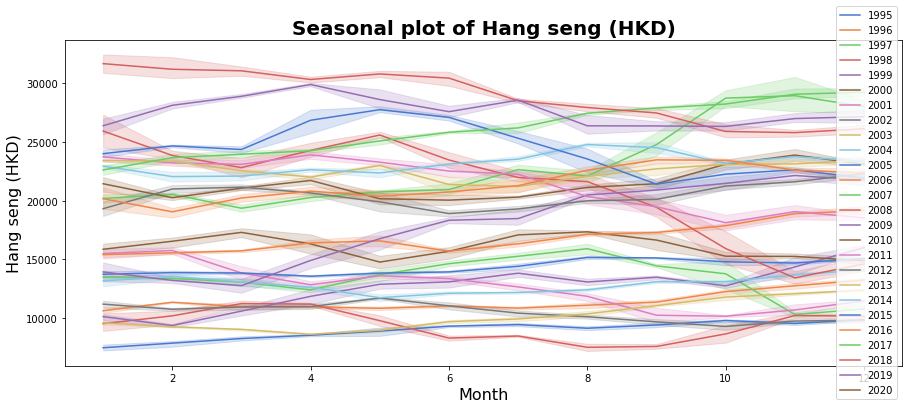

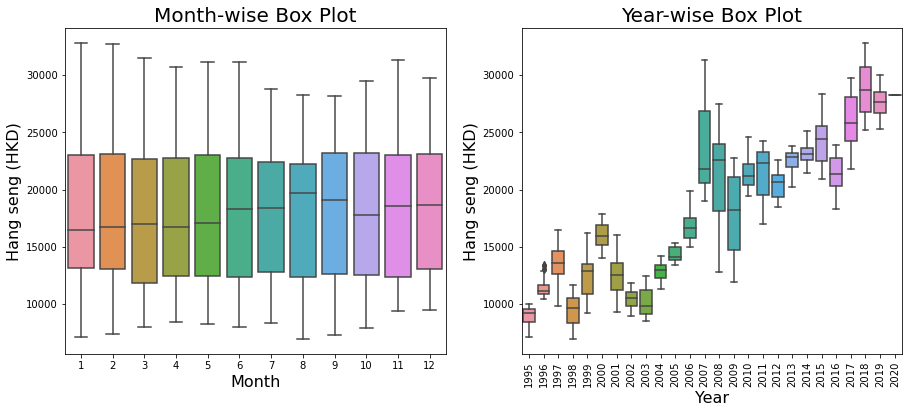

C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['year'] = season_df.Date.dt.year
C:\Users\PANAGI~1.MAV\AppData\Local\Temp/ipykernel_12696/4164348269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_df['month'] = season_df.Date.dt.month


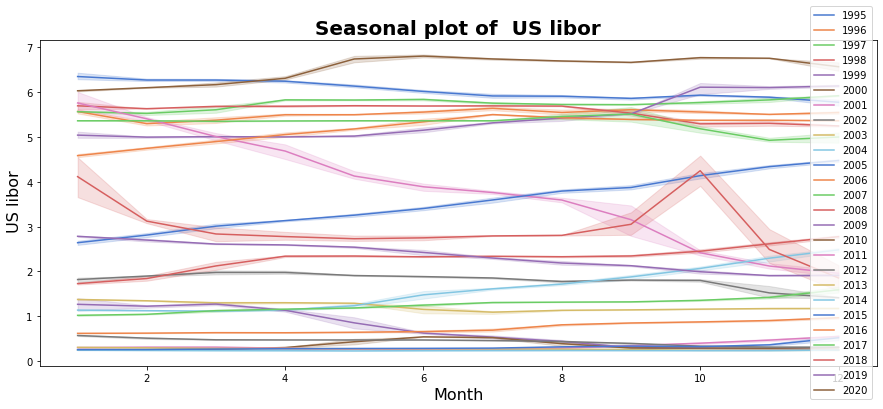

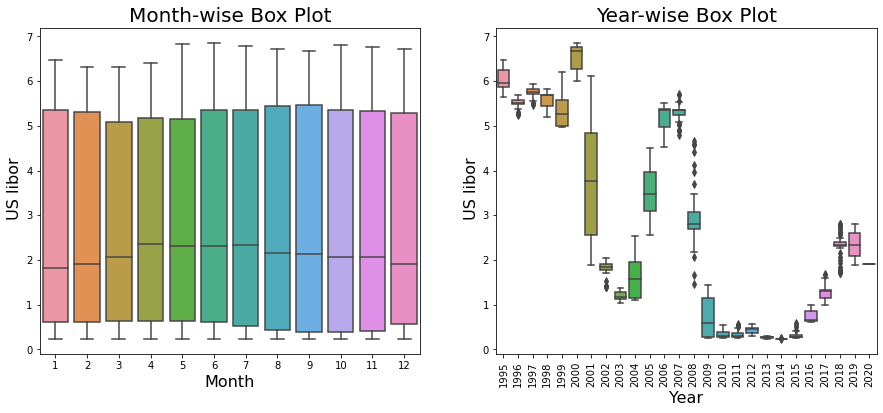

In [12]:
df['Date'] = df.index
for column in df.columns[:-1]:
    season_plot(df, column)